<a href="https://colab.research.google.com/github/vpkrishna/mlfundas/blob/main/shakspeare_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchtext.data.utils import get_tokenizer
from nltk.probability import FreqDist

text = "In the city of Dataville, a data analyst named Alex explores hidden insights within vast data. \
With determination, Alex uncovers patterns, cleanses the data, and unlocks innovation. Join this adventure to unleash the power of data-driven decisions."

# Initialize the tokenizer and tokenize the text
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(text)

In [ ]:

threshold = 1
# Remove rare words and print common tokens
freq_dist = FreqDist(tokens)
common_tokens = [token for token in tokens if freq_dist[token] > threshold]
print(common_tokens)

['the', 'of', ',', 'data', 'alex', 'data', '.', ',', 'alex', ',', 'the', 'data', ',', '.', 'the', 'of', '.']


In [ ]:
# Initialize and tokenize the text
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(text)
print(tokens)

['in', 'the', 'city', 'of', 'dataville', ',', 'a', 'data', 'analyst', 'named', 'alex', 'explores', 'hidden', 'insights', 'within', 'vast', 'data', '.', 'with', 'determination', ',', 'alex', 'uncovers', 'patterns', ',', 'cleanses', 'the', 'data', ',', 'and', 'unlocks', 'innovation', '.', 'join', 'this', 'adventure', 'to', 'unleash', 'the', 'power', 'of', 'data-driven', 'decisions', '.']


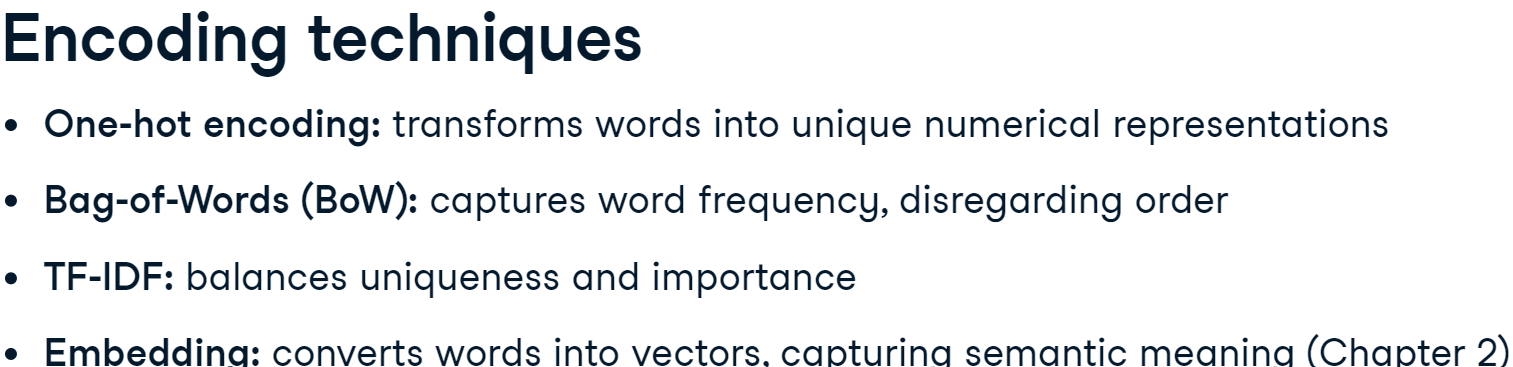

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

titles = ['The Great Gatsby','To Kill a Mockingbird','1984','The Catcher in the Rye','The Hobbit', 'Great Expectations']

# Initialize Bag-of-words with the list of book titles
vectorizer = CountVectorizer()
bow_encoded_titles = vectorizer.fit_transform(titles)

# Extract and print the first five features
print(vectorizer.get_feature_names_out()[:5])
print(bow_encoded_titles.toarray()[0, :5])

['1984' 'catcher' 'expectations' 'gatsby' 'great']
[0 0 0 1 1]


In [ ]:
bow_encoded_titles.toarray()

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names_out()

array(['1984', 'catcher', 'expectations', 'gatsby', 'great', 'hobbit',
       'in', 'kill', 'mockingbird', 'rye', 'the', 'to'], dtype=object)

In [ ]:
import pandas as pd


# Create a DataFrame from the encoded titles
df = pd.DataFrame(bow_encoded_titles.toarray(), columns=vectorizer.get_feature_names_out())

# Print the DataFrame
df

,1984,catcher,expectations,gatsby,great,hobbit,in,kill,mockingbird,rye,the,to
0,0,0,0,1,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,2,0
4,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
%pip install nltk

In [ ]:
import nltk
stop_words = set(stopwords.words("english"))

NameError: name 'stopwords' is not defined

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
# Initialize the tokenizer and stemmer
tokenizer = get_tokenizer("basic_english")
stemmer = PorterStemmer()

In [ ]:
# Create a list of stopwords
stop_words = set(stopwords.words("english"))

# Initialize the tokenizer and stemmer
tokenizer = get_tokenizer("basic_english")
stemmer = PorterStemmer()

# Complete the function to preprocess sentences
def preprocess_sentences(sentences):
    processed_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokens = ____(sentence)
        tokens = [token for token in tokens if token not in ____]
        tokens = [____.____(token) for token in tokens]
        processed_sentences.append(' '.join(tokens))
    return processed_sentences

processed_shakespeare = preprocess_sentences(shakespeare)
print(processed_shakespeare[:5])

NameError: name 'shakespeare' is not defined

In [ ]:
# Define your Dataset class
class ShakespeareDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
import torch
from torch import nn

In [ ]:
qaz=["This", "book", "was", "fantastic", "I", "really", "love", "science", "fiction", "but", "the", "protagonist", "was", "rude", "sometimes"]
{word: i for i, word in enumerate(qaz)}

{'This': 0,
 'book': 1,
 'was': 12,
 'fantastic': 3,
 'I': 4,
 'really': 5,
 'love': 6,
 'science': 7,
 'fiction': 8,
 'but': 9,
 'the': 10,
 'protagonist': 11,
 'rude': 13,
 'sometimes': 14}

In [ ]:
# Map a unique index to each word
words = ["This", "book", "was", "fantastic", "I", "really", "love", "science", "fiction", "but", "the", "protagonist", "was", "rude", "sometimes"]
word_to_idx = {word: i for i, word in enumerate(words)}


# Convert word_to_idx to a tensor
inputs = torch.LongTensor([word_to_idx[w] for w in words])


print("word_to_idx ===>",word_to_idx,'\n',[word_to_idx[w] for w in words])
# Initialize embedding layer with ten dimensions
embedding = nn.Embedding(num_embeddings=len(words), embedding_dim=10)

# Pass the tensor to the embedding layer
output = embedding(inputs)
print(output)

word_to_idx ===> {'This': 0, 'book': 1, 'was': 12, 'fantastic': 3, 'I': 4, 'really': 5, 'love': 6, 'science': 7, 'fiction': 8, 'but': 9, 'the': 10, 'protagonist': 11, 'rude': 13, 'sometimes': 14} 
 [0, 1, 12, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
tensor([[ 5.4715e-01,  9.0476e-01, -3.7999e-01,  1.6081e+00,  8.4616e-01,
          1.3017e-01,  3.6683e-01, -4.3003e-01, -5.5476e-01,  1.3151e+00],
        [-5.2081e-02,  6.7382e-01, -1.0992e+00,  1.2877e+00, -1.4509e+00,
         -3.6348e-03, -7.6918e-01,  1.5176e+00,  1.0031e-01,  9.0068e-02],
        [-7.0125e-01, -1.2098e-01, -9.8028e-02, -5.5523e-01,  1.0597e+00,
          2.1145e+00, -7.5703e-01, -4.1483e-01,  2.2740e-01, -1.6133e+00],
        [ 1.1986e+00, -3.4982e-01,  1.6487e+00,  5.7771e-01, -4.9913e-01,
          2.0131e+00,  1.8081e+00,  1.2187e+00, -7.2654e-02,  1.0613e+00],
        [-1.4804e+00,  5.0358e-01, -1.0904e+00, -9.3451e-01,  9.1722e-01,
          9.8841e-01,  6.8718e-01, -5.9597e-01,  1.7992e-01, -2.2600e-01],
     

In [ ]:
## So read the verbatim below regarding embeddings.. Initially a random table is created with the index in this table pointing to index from the list of words
## Then as the model gets trained these values are also updated accordingly

The embedding table is essentially the embedding object that you created with the line embedding = nn.Embedding(num_embeddings=len(words), embedding_dim=10). This object is a lookup table that stores the embeddings for each word in your vocabulary. The embeddings are initially random, but they’re meant to be learned during training.

When you call embedding(inputs), the embedding object looks at each index in inputs and returns the corresponding embedding from the lookup table. The mapping from words to indices is determined by the word_to_idx dictionary that you created earlier.

For example, in your word_to_idx dictionary, the word “This” is mapped to the index 0, the word “book” is mapped to the index 1, and so on. So when you pass the index 0 to the embedding object, it returns the embedding for the word “This”. Similarly, when you pass the index 1, it returns the embedding for the word “book”.

So, to answer your question, the embedding object doesn’t directly know that 0 maps to “This” or 1 maps to “book”. It only knows that it has an embedding for index 0, an embedding for index 1, etc. The mapping from indices to words is handled by the word_to_idx dictionary

In [ ]:
# Create a list of stopwords
stop_words = set(stopwords.words("english"))

# Initialize the tokenizer and stemmer
tokenizer = get_tokenizer("basic_english")
stemmer = PorterStemmer()

# Complete the function to preprocess sentences
def preprocess_sentences(sentences):
    processed_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokens = ____(sentence)
        tokens = [token for token in tokens if token not in ____]
        tokens = [____.____(token) for token in tokens]
        processed_sentences.append(' '.join(tokens))
    return processed_sentences

processed_shakespeare = preprocess_sentences(shakespeare)
print(processed_shakespeare[:5])

In [ ]:
# Define your Dataset class
class ShakespeareDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

# Complete the encoding function
def encode_sentences(sentences):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    return X.toarray(), vectorizer

# Complete the text processing pipeline
def text_processing_pipeline(sentences):
    processed_sentences = preprocess_sentences(sentences)
    encoded_sentences, vectorizer = encode_sentences(processed_sentences)
    dataset = ShakespeareDataset(encoded_sentences)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
    return dataloader, vectorizer

dataloader, vectorizer = text_processing_pipeline(processed_shakespeare)

# Print the vectorizer's feature names and the first 10 components of the first item
print(vectorizer.get_feature_names_out()[:10])
print(next(iter(dataloader))[0, :10])

In [ ]:
data = "hari is sarvothama . Vayu is jeevothama"
chars=list(set(data))
print(chars)
char_to_idx = {char: i for i, char in enumerate(chars)}
print(char_to_idx)
idx_to_char = {i: char for i, char in enumerate(chars)}
print(idx_to_char)

['m', 'V', 't', 'y', 'h', 'o', 's', 'u', 'a', 'i', '.', 'v', ' ', 'r', 'e', 'j']
{'m': 0, 'V': 1, 't': 2, 'y': 3, 'h': 4, 'o': 5, 's': 6, 'u': 7, 'a': 8, 'i': 9, '.': 10, 'v': 11, ' ': 12, 'r': 13, 'e': 14, 'j': 15}
{0: 'm', 1: 'V', 2: 't', 3: 'y', 4: 'h', 5: 'o', 6: 's', 7: 'u', 8: 'a', 9: 'i', 10: '.', 11: 'v', 12: ' ', 13: 'r', 14: 'e', 15: 'j'}


In [ ]:
len(chars)

16

In [ ]:
! pip install -q torchview
! pip install -q -U graphviz

In [ ]:
from torchview import draw_graph
from torch import nn
import torch
import graphviz

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

'svg'

In [ ]:
# Include an RNN layer and linear layer in RNNmodel class
import torch
from torch import nn
class RNNmodel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNmodel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
      h0 = torch.zeros(1, x.size(0), self.hidden_size)
      out, _ = self.rnn(x, h0)
      out = self.fc(out[:, -1, :])
      return out

# Instantiate the RNN model
model = RNNmodel(len(chars), 16,  len(chars))
print(model)

RNNmodel(
  (rnn): RNN(16, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=16, bias=True)
)


In [ ]:
model_graph_1 = draw_graph(
    RNNmodel(len(chars), 16,  len(chars)), input_size=(len(chars), 16,  len(chars)),
    graph_name='RecursiveNet',
    roll=True
)

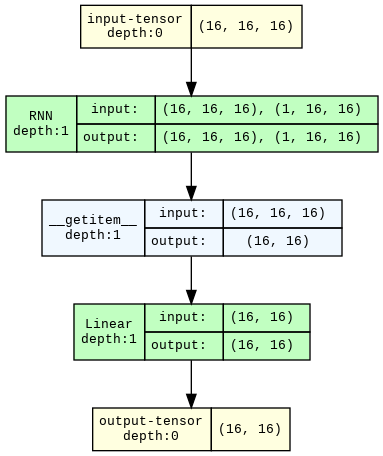

In [ ]:
model_graph_1.visual_graph

In [ ]:
inputs=[char_to_idx[ch] for ch in data[:-1]]
targets=[char_to_idx[ch] for ch in data[1:]]

print(inputs)
print(targets)
inputs=torch.tensor(inputs,dtype=torch.long).view(-1,1)
inputs=nn.functional.one_hot(inputs,num_classes=len(chars)).float()
targets = torch.LongTensor(targets)
print(inputs.shape,inputs)

[4, 8, 13, 9, 12, 9, 6, 12, 6, 8, 13, 11, 5, 2, 4, 8, 0, 8, 12, 10, 12, 1, 8, 3, 7, 12, 9, 6, 12, 15, 14, 14, 11, 5, 2, 4, 8, 0]
[8, 13, 9, 12, 9, 6, 12, 6, 8, 13, 11, 5, 2, 4, 8, 0, 8, 12, 10, 12, 1, 8, 3, 7, 12, 9, 6, 12, 15, 14, 14, 11, 5, 2, 4, 8, 0, 8]
torch.Size([38, 1, 16]) tensor([[[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0.,

In [ ]:
# Instantiate the loss function
criterion = nn.CrossEntropyLoss()
# Instantiate the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1080):
    model.train()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/100, Loss: {loss.item()}')

Epoch 10/100, Loss: 2.384908437728882
Epoch 20/100, Loss: 1.9949780702590942
Epoch 30/100, Loss: 1.5139051675796509
Epoch 40/100, Loss: 1.090847134590149
Epoch 50/100, Loss: 0.847396969795227
Epoch 60/100, Loss: 0.7351223826408386
Epoch 70/100, Loss: 0.6884651184082031
Epoch 80/100, Loss: 0.6680712699890137
Epoch 90/100, Loss: 0.6577922105789185
Epoch 100/100, Loss: 0.6518296003341675
Epoch 110/100, Loss: 0.6479564905166626
Epoch 120/100, Loss: 0.6452126502990723
Epoch 130/100, Loss: 0.6431455612182617
Epoch 140/100, Loss: 0.6415226459503174
Epoch 150/100, Loss: 0.6402112245559692
Epoch 160/100, Loss: 0.6391292214393616
Epoch 170/100, Loss: 0.6382220387458801
Epoch 180/100, Loss: 0.637451708316803
Epoch 190/100, Loss: 0.6367904543876648
Epoch 200/100, Loss: 0.6362177729606628
Epoch 210/100, Loss: 0.6357178688049316
Epoch 220/100, Loss: 0.6352781057357788
Epoch 230/100, Loss: 0.6348893642425537
Epoch 240/100, Loss: 0.634543240070343
Epoch 250/100, Loss: 0.6342338919639587
Epoch 260/100,

In [ ]:
model.eval()
test_input = char_to_idx['r']
test_input = nn.functional.one_hot(torch.tensor(test_input).view(-1, 1), num_classes=len(chars)).float()
predicted_output = model(test_input)
predicted_char_idx = torch.argmax(predicted_output, 1).item()
print(f"Test Input: 'r', Predicted Output: '{idx_to_char[predicted_char_idx]}'")

Test Input: 'r', Predicted Output: 'v'


In [ ]:
predicted_output

tensor([[-1.2461,  0.6200,  0.0456, -2.0940, -2.2405, -0.4771,  0.7846, -3.0683,
         -2.6158,  9.4467,  0.2153,  9.4467,  0.2900, -2.4124,  0.4942,  0.3130]],
       grad_fn=<AddmmBackward0>)

In [ ]:
import keras
import numpy as np
import random

import io
path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()

chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

sentences = []
next_chars = []
for i in range(0, len(text) - 40, 3):
    sentences.append(text[i: i + 40])
    next_chars.append(text[i + 40])


600901/600901 [==============================] - 1s 2us/step


In [ ]:

x = np.zeros((len(sentences), 40, len(chars)))
y = np.zeros((len(sentences), len(chars)))
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [ ]:
for i,a in enumerate(sentences[0:10]):
  print("sentenecs==>",a,"h",len(a)),
  print(next_chars[i])

sentenecs==> preface


supposing that truth is a woma h 40
n
sentenecs==> face


supposing that truth is a woman-- h 40
w
sentenecs==> e


supposing that truth is a woman--wha h 40
t
sentenecs==> 
supposing that truth is a woman--what t h 40
h
sentenecs==> pposing that truth is a woman--what then h 40
?
sentenecs==> sing that truth is a woman--what then? i h 40
s
sentenecs==> g that truth is a woman--what then? is t h 40
h
sentenecs==> hat truth is a woman--what then? is ther h 40
e
sentenecs==>  truth is a woman--what then? is there n h 40
o
sentenecs==> uth is a woman--what then? is there not  h 40
g


In [ ]:
text[:500]

'preface\n\n\nsupposing that truth is a woman--what then? is there not ground\nfor suspecting that all philosophers, in so far as they have been\ndogmatists, have failed to understand women--that the terrible\nseriousness and clumsy importunity with which they have usually paid\ntheir addresses to truth, have been unskilled and unseemly methods for\nwinning a woman? certainly she has never allowed herself to be won; and\nat present every kind of dogma stands with sad and discouraged mien--if,\nindeed, it s'

In [ ]:
for i,a in enumerate(x[0:10]):
  print("sentenecs==>",a,len(a),a.shape),
  print("y==>",y[i])

sentenecs==> [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 40 (40, 57)
y==> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sentenecs==> [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 40 (40, 57)
y==> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]
sentenecs==> [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 40 (40, 57)
y==> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import random
import urllib.request
import io

# Download the text file
url = 'https://s3.amazonaws.com/text-datasets/nietzsche.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8').lower()[0:10000]

chars = sorted(list(set(data)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

sentences = []
next_chars = []
for i in range(0, len(data) - 40, 3):
    sentences.append(data[i: i + 40])
    next_chars.append(data[i + 40])

x = np.zeros((len(sentences), 40), dtype=np.int64)
y = np.zeros((len(sentences)), dtype=np.int64)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t] = char_indices[char]
    y[i] = char_indices[next_chars[i]]



In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

model = RNN(len(chars), 40, len(chars))

In [ ]:
# Instantiate the loss function
criterion = nn.NLLLoss()
# Instantiate the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Convert numpy arrays to PyTorch tensors
x = torch.from_numpy(x)[0:10000]
y = torch.from_numpy(y)[0:10000]


In [ ]:
%%time
def clip_grads(model, clip):
    parameters = [p for p in model.parameters() if p.grad is not None]
    for p in parameters:
        p.grad.data.clamp_(-clip, clip)

# Training loop
for epoch in range(50):  # Number of epochs
    total_loss = 0
    for i in range(x.shape[0]):
        sentence = x[i]
        target = y[i]
        hidden = model.initHidden()
        model.zero_grad()
        loss = 0
        for j in range(sentence.size()[0]):
            input_char = torch.zeros(1, len(chars))  # Create a one-hot vector for each character
            input_char[0][sentence[j]] = 1.0  # Set the index of the current character to 1
            output, hidden = model(input_char, hidden)
            l = criterion(output, torch.tensor([target]))
            loss += l
        loss.backward()
        clip_grads(model, 5)  # Clip gradients to prevent them from exploding
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 10 == 0:
      print(f'Epoch {epoch+1}/100, Loss: {total_loss/x.shape[0]}')

Epoch 10/100, Loss: 121.1191752904869
Epoch 20/100, Loss: 121.86349084463464
Epoch 30/100, Loss: 122.89712682057576
Epoch 40/100, Loss: 124.77204613972859
Epoch 50/100, Loss: 125.16993550220168
CPU times: user 2h 12min 2s, sys: 4.21 s, total: 2h 12min 6s
Wall time: 33min 2s


In [ ]:
def generate_text(seed_string, generate_length=500):
    model.eval()  # Set the model to evaluation mode
    sentence = seed_string.lower()
    generated = '' + sentence

    for i in range(generate_length):
        x_pred = torch.zeros(1, 1, len(chars))
        for t, char in enumerate(sentence):
            if char in char_indices:
                x_pred[0, 0, char_indices[char]] = 1.

        hidden = model.initHidden()
        output, hidden = model(x_pred[0], hidden)
        output_dist = output.data.view(-1).exp()
        top_i = torch.multinomial(output_dist, 1)[0].item()
        predicted_char = indices_char[top_i]
        generated += predicted_char
        sentence = sentence[1:] + predicted_char

    return generated

# Generate text with a seed string
print(generate_text("pposing that truth is a woman--what then", 10))

pposing that truth is a woman--what theneeeeeeeeee


In [ ]:
# Convert numpy arrays to PyTorch tensors
x = torch.from_numpy(x)
y = torch.from_numpy(y)

# Training loop
for epoch in range(100):  # Number of epochs
    total_loss = 0
    for i in range(x.shape[0]):
        sentence = x[i]
        target = y[i]
        hidden = model.initHidden()
        model.zero_grad()
        loss = 0
        for j in range(sentence.size()[0]):
            input_char = torch.zeros(1, len(chars))  # Create a one-hot vector for each character
            input_char[0][sentence[j]] = 1.0  # Set the index of the current character to 1
            output, hidden = model(input_char, hidden)
            l = criterion(output, torch.tensor([target]))
            loss += l
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/100, Loss: {total_loss/x.shape[0]}')

Epoch 10/100, Loss: nan
Epoch 20/100, Loss: nan
Epoch 30/100, Loss: nan
Epoch 40/100, Loss: nan
Epoch 50/100, Loss: nan
Epoch 60/100, Loss: nan
Epoch 70/100, Loss: nan
Epoch 80/100, Loss: nan
Epoch 90/100, Loss: nan
Epoch 100/100, Loss: nan


In [ ]:
criterion = nn.CrossEntropyLoss()
# Instantiate the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Prepare the data
inputs = [torch.tensor(sequence[:-1], dtype=torch.long) for sequence in sequences]
targets = [torch.tensor(sequence[1:], dtype=torch.long) for sequence in sequences]

# Pad the sequences
inputs = pad_sequence(inputs, batch_first=True)
targets = pad_sequence(targets, batch_first=True)

NameError: name 'sequences' is not defined

In [ ]:
for epoch in range(1):
    for i in range(x.shape[0]):
        sentence = torch.tensor(x[i], dtype=torch.long)  # Change dtype to long for indices
        hidden = model.initHidden()
        model.zero_grad()
        loss = 0
        for j in range(sentence.size()[0]):
            input_char = torch.zeros(1, len(chars))  # Create a one-hot vector for each character
            input_char[0][sentence[j]] = 1.0  # Set the index of the current character to 1
            output, hidden = model(input_char, hidden)
            target_index = y[i]  # Use the index of the target character
            l = criterion(output, torch.tensor([target_index]))
            loss += l
        loss.backward()
        optimizer.step()

In [ ]:
# Text generation
start_index = random.randint(0, len(data) - 40 - 1)
generated = ''
sentence = data[start_index: start_index + 40]
generated += sentence
for i in range(400):
    x_pred = torch.zeros(1, 1, len(chars))
    for t, char in enumerate(sentence):
        x_pred[0, 0, char_indices[char]] = 1.
    hidden = model.initHidden()
    output, hidden = model(x_pred[0], hidden)
    output_dist = output.data.view(-1).exp()  # Remove the division by diversity
    top_i = torch.multinomial(output_dist, 1)[0]
    predicted_char = indices_char[top_i]
    generated += predicted_char
    sentence = sentence[1:] + predicted_char

with open('example.txt', 'w') as f:
    f.write(generated)

RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import random
import urllib.request
import io
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
from torch.nn import Embedding

# Download the text file
url = 'https://s3.amazonaws.com/text-datasets/nietzsche.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8').lower()

# Tokenize the text into words
words = data.split()

# Create a vocabulary of unique words and their indices
vocab = {word: i for i, word in enumerate(Counter(words))}

# Convert the sentences into sequences of word indices
sequences = [[vocab[word] for word in sentence.split()] for sentence in sentences]

# Define the model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = Embedding(input_size, hidden_size)
        self.i2h = nn.Linear(hidden_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(hidden_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        combined = torch.cat((embedded, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

model = RNN(len(vocab), 128, len(vocab))
criterion = nn.NLLLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

# Training
for epoch in range(1):
    for i in range(len(sequences)):
        sentence = torch.tensor(sequences[i], dtype=torch.long)
        target = torch.tensor(sequences[i][1:] + [vocab['<eos>']], dtype=torch.long)
        hidden = model.initHidden()
        model.zero_grad()
        loss = 0
        for j in range(sentence.size()[0]):
            output, hidden = model(sentence[j].view(1), hidden)
            l = criterion(output, target[j].view(1))
            loss += l
        loss.backward()
        optimizer.step()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import random
import urllib.request
import io
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
from torch.nn import Embedding

In [ ]:
# read in the text, transforming everything to lower case
text = open('/content/drive/MyDrive/2Stanford/0importantcodes/holmes.txt').read().lower()
print('our original text has ' + str(len(text)) + ' characters')

our original text has 581864 characters


In [ ]:
### find and replace '\n' and '\r' symbols - replacing them
text = text[1302:]
text = text.replace('\n',' ')    # replacing '\n' with '' simply removes the sequence
text = text.replace('\r',' ')



### find and replace '\n' and '\r' symbols - replacing them
### find and replace '\n' and '\r' symbols - replacing them
text = text[1302:]
text = text.replace('\n',' ')    # replacing '\n' with '' simply removes the sequence
text = text.replace('\r',' ')


### list all unique characters in the text and remove any non-english ones
# find all unique characters in the text
unique = set(text)
#create list of characters to remove from corpus
non_english = [c for c in unique if c not in " abcdefghijklmnopqrstuvwxyz:!.;,?'"]
for r in non_english:
    text = text.replace(r,'')

# shorten any extra dead space created above
text = text.replace('  ',' ')



# count the number of unique characters in the text
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("this corpus has " +  str(len(text)) + " total number of characters")
print ("this corpus has " +  str(len(chars)) + " unique characters")


def window_transform_text(text,window_size,step_size):
    # containers for input/output pairs
    inputs = []
    outputs = []
    #initial input string list
    initial_seq = [x for x in text[0:window_size]]
    #create input/outputs from sliding window over text
    for i in range(0,len(text)-window_size,step_size):
        outputs.append(text[i+window_size])
        inputs.append(initial_seq)
        initial_seq = initial_seq[step_size:]
        initial_seq.extend(text[i+window_size:i+window_size+step_size])


    return inputs,outputs



# run your text window-ing function
window_size = 100
step_size = 5
inputs, outputs = window_transform_text(text,window_size,step_size)


# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + str(inputs[2]))
print('output = ' + str(outputs[2]))
print('--------------')
print('input = ' + str(inputs[100]))
print('output = ' + str(outputs[100]))

this corpus has 566796 total number of characters
this corpus has 34 unique characters
input = ['.', ' ', 'y', 'o', 'u', ' ', 'd', 'i', 'd', ' ', 'n', 'o', 't', ' ', 't', 'e', 'l', 'l', ' ', 'm', 'e', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'i', 'n', 't', 'e', 'n', 'd', 'e', 'd', ' ', 't', 'o', ' ', 'g', 'o', ' ', 'i', 'n', 't', 'o', ' ', 'h', 'a', 'r', 'n', 'e', 's', 's', '.', ' ', 't', 'h', 'e', 'n', ',', ' ', 'h', 'o', 'w', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', '?', ' ', 'i', ' ', 's', 'e', 'e', ' ', 'i', 't', ',', ' ', 'i', ' ', 'd', 'e', 'd', 'u', 'c']
output = e
--------------
input = ['u', 'c', 'e', ' ', 'i', 't', '.', ' ', 'a', 's', ' ', 't', 'o', ' ', 'm', 'a', 'r', 'y', ' ', 'j', 'a', 'n', 'e', ',', ' ', 's', 'h', 'e', ' ', 'i', 's', ' ', 'i', 'n', 'c', 'o', 'r', 'r', 'i', 'g', 'i', 'b', 'l', 'e', ',', ' ', 'a', 'n', 'd', ' ', 'm', 'y', ' ', 'w', 'i', 'f', 'e', ' ', 'h', 'a', 's', ' ', 'g', 'i', 'v', 'e', 'n', ' ', 'h', 'e', 'r', ' ', 'n', 'o',

In [ ]:
# run your text window-ing function
window_size = 10
step_size = 1
inputs, outputs = window_transform_text(text,window_size,step_size)
print('input = ' + str(inputs[0]))
print('output = ' + str(outputs[0]))
print('--------------')
window_size = 4
step_size = 2
inputs, outputs = window_transform_text(text,window_size,step_size)
# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + str(inputs[0]))
print('output = ' + str(outputs[0]))
print('--------------')
print('input = ' + str(inputs[1]))
print('output = ' + str(outputs[1]))
print('--------------')
print('input = ' + str(inputs[2]))
print('output = ' + str(outputs[2]))
print('--------------')


input = [' ', 'i', ' ', 'o', 'b', 's', 'e', 'r', 'v', 'e']
output = .
--------------
input = [' ', 'i', ' ', 'o']
output = b
--------------
input = [' ', 'o', 'b', 's']
output = e
--------------
input = ['b', 's', 'e', 'r']
output = v
--------------


In [ ]:
# print out the number of unique characters in the dataset
chars = sorted(list(set(text)))
print ("this corpus has " +  str(len(chars)) + " unique characters")
print ('and these characters are ')
print (chars)

this corpus has 34 unique characters
and these characters are 
[' ', '!', "'", ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [ ]:
# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,window_size,step_size):
    # number of unique chars
    chars = sorted(list(set(text)))
    num_chars = len(chars)

    # cut up text into character input/output pairs
    inputs, outputs = window_transform_text(text,window_size,step_size)

    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars))
    y = np.zeros((len(inputs), num_chars))

    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            X[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[outputs[i]]] = 1

    return X,y

In [ ]:
data=text[0:3000]
window_size = 5
step_size = 1
inputs, outputs = window_transform_text(data,window_size,step_size)
print(data)
X,y = encode_io_pairs(data,window_size,step_size)
for index,inp in enumerate(inputs):
  print(inp)
  print(outputs[index])
  print(X[index])
  print(y[index])

 i observe. you did not tell me that you intended to go into harness. then, how do you know? i see it, i deduce it. how do i know that you have been getting yourself very wet lately, and that you have a most clumsy and careless servant girl? my dear holmes, said i, this is too much. you would certainly have been burned, had you lived a few centuries ago. it is true that i had a country walk on thursday and came home in a dreadful mess, but as i have changed my clothes i can't imagine how you deduce it. as to mary jane, she is incorrigible, and my wife has given her notice, but there, again, i fail to see how you work it out. he chuckled to himself and rubbed his long, nervous hands together. it is simplicity itself, said he; my eyes tell me that on the inside of your left shoe, just where the firelight strikes it, the leather is scored by six almost parallel cuts. obviously they have been caused by someone who has very carelessly scraped round the edges of the sole in order to remove c

IndexError: index 32 is out of bounds for axis 1 with size 32

In [ ]:
# use your function
window_size = 100
step_size = 5
X,y = encode_io_pairs(text,window_size,step_size)

In [ ]:
print(X[0],y[0])
print(X[1],y[1])

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np
import tensorflow as tf

def process_text(file_path):
    text = open(file_path, 'rb').read().decode(encoding='utf-8')  # Read, then decode for py2 compat.
    vocab = sorted(set(text))  # The unique characters in the file
    # Creating a mapping from unique characters to indices and vice versa
    char2idx = {u: i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    text_as_int = np.array([char2idx[c] for c in text])
    return text_as_int, vocab, char2idx, idx2char


def split_input_target(chunk):
    input_text, target_text = chunk[:-1], chunk[1:]
    return input_text, target_text


def create_dataset(text_as_int, seq_length=100, batch_size=64, buffer_size=10000):
    char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
    dataset = char_dataset.batch(seq_length + 1, drop_remainder=True).map(split_input_target)
    dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
    return dataset


def build_model(vocab_size, embedding_dim=256, rnn_units=1024, batch_size=64):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)


def generate_text(model, char2idx, idx2char, start_string, generate_char_num=1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    # Low temperatures results in more predictable text, higher temperatures results in more surprising text.
    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []  # Empty string to store our results
    model.reset_states()
    for i in range(generate_char_num):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)    # remove the batch dimension
        predictions /= temperature
        # using a categorical distribution to predict the character returned by the model
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        # We pass the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], axis=0)
        text_generated.append(idx2char[predicted_id])
    return start_string + ''.join(text_generated)


# path_to_file = tf.keras.utils.get_file('nietzsche.txt', 'https://s3.amazonaws.com/text-datasets/nietzsche.txt')
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

text_as_int, vocab, char2idx, idx2char = process_text(path_to_file)
dataset = create_dataset(text_as_int)
model = build_model(vocab_size=len(vocab))
model.compile(optimizer='adam', loss=loss)
model.summary()
history = model.fit(dataset, epochs=50)
model.save_weights("gen_text_weights.h5", save_format='h5')
# To keep this prediction step simple, use a batch size of 1
model = build_model(vocab_size=len(vocab), batch_size=1)
model.load_weights("gen_text_weights.h5")
model.summary()

user_input = input("Write the beginning of the text, the program will complete it. Your input is: ")
generated_text = generate_text(model, char2idx, idx2char, start_string=user_input, generate_char_num=2000)
print(generated_text)

1115394/1115394 [==============================] - 1s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dropout (Dropout)           (64, None, 1024)          0         
                                                                 
 batch_normalization (Batch  (64, None, 1024)          4096      
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (64, None, 1024)          8392704   
                                                                 
 dropout_1 (Dropout)         (64, None, 1024)          0   

In [ ]:
import numpy as np
import tensorflow as tf

def process_text(file_path):
    text = open(file_path, 'rb').read().decode(encoding='utf-8')  # Read, then decode for py2 compat.
    vocab = sorted(set(text))  # The unique characters in the file
    # Creating a mapping from unique characters to indices and vice versa
    char2idx = {u: i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    text_as_int = np.array([char2idx[c] for c in text])
    return text_as_int, vocab, char2idx, idx2char


def split_input_target(chunk):
    input_text, target_text = chunk[:-1], chunk[1:]
    return input_text, target_text


def create_dataset(text_as_int, seq_length=100, batch_size=64, buffer_size=10000):
    char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
    dataset = char_dataset.batch(seq_length + 1, drop_remainder=True).map(split_input_target)
    dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
    return dataset
# path_to_file = tf.keras.utils.get_file('nietzsche.txt', 'https://s3.amazonaws.com/text-datasets/nietzsche.txt')
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

text_as_int, vocab, char2idx, idx2char = process_text(path_to_file)
dataset = create_dataset(text_as_int)

1115394/1115394 [==============================] - 1s 1us/step


In [ ]:
print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>


In [ ]:
user_input = input("Write the beginning of the text, the program will complete it. Your input is: ")
generated_text = generate_text(model, char2idx, idx2char, start_string=user_input, generate_char_num=200)
print(generated_text)

Write the beginning of the text, the program will complete it. Your input is: the tidle will
the tidle will do all the world:
Supposed the very bond of love, though I thank my life.

KATHARINA:
Gentlemen, forward to the bridal dinner:
I little lord.
This is the city Corioli is flad at hand,
Ensues his pite


In [ ]:
! pip install -q torchview
! pip install -q -U graphviz

In [ ]:
from torchview import draw_graph
from torch import nn
import torch
import graphviz

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

'svg'

In [ ]:
class MLP(nn.Module):
    """Multi Layer Perceptron with inplace option.
    Make sure inplace=true and false has the same visual graph"""

    def __init__(self, inplace: bool = True) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace),
            nn.Linear(128, 128),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layers(x)
        return x

In [ ]:
model_graph_1 = draw_graph(
    MLP(), input_size=(2, 128),
    graph_name='MLP',
    hide_inner_tensors=False,
    hide_module_functions=False,
)

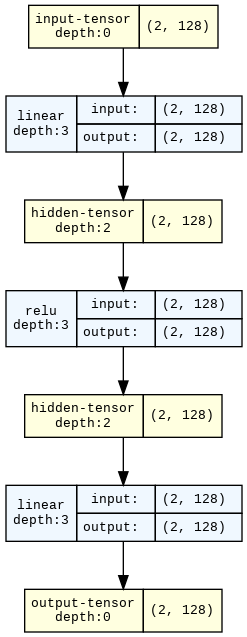

In [ ]:
model_graph_1.visual_graph

In [ ]:
import tensorflow as tf

def build_model(vocab_size, embedding_dim=256, rnn_units=1024, batch_size=64):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


text_as_int, vocab, char2idx, idx2char = process_text(path_to_file)
dataset = create_dataset(text_as_int)
model = build_model(vocab_size=len(vocab))
model = build_model(vocab_size=len(vocab), batch_size=1)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (1, None, 256)            16640     
                                                                 
 lstm_12 (LSTM)              (1, None, 1024)           5246976   
                                                                 
 dropout_12 (Dropout)        (1, None, 1024)           0         
                                                                 
 batch_normalization_12 (Ba  (1, None, 1024)           4096      
 tchNormalization)                                               
                                                                 
 lstm_13 (LSTM)              (1, None, 1024)           8392704   
                                                                 
 dropout_13 (Dropout)        (1, None, 1024)           0         
                                                      

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import urllib.request
import os
from torch.utils.data import Dataset, DataLoader

# Same as process_text function
def process_text(file_path):
    text = open(file_path, 'r').read()  # Read the text file
    vocab = sorted(set(text))  # The unique characters in the file
    # Creating a mapping from unique characters to indices and vice versa
    char2idx = {u: i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    text_as_int = np.array([char2idx[c] for c in text])
    return text_as_int, vocab, char2idx, idx2char

# Same as split_input_target function
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

# Similar to create_dataset function
class TextDataset(Dataset):
    def __init__(self, text, seq_length=100):
        self.seq_length = seq_length
        self.text = text
        self.samples = self.process_text()

    def process_text(self):
        inputs, targets = [], []
        for i in range(0, len(self.text) - self.seq_length, 1):
            inputs.append(self.text[i:i+self.seq_length])
            targets.append(self.text[i+1:i+self.seq_length+1])
        return inputs, targets

    def __len__(self):
        return len(self.samples[0])

    def __getitem__(self, idx):
        return self.samples[0][idx], self.samples[1][idx]

# Similar to build_model function
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=256, hidden_size=1024, num_layers=2, dropout=0.1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x

# Similar to generate_text function
def generate_text(model, char2idx, idx2char, start_string, generate_char_num=1000, temperature=1.0):
    model.eval()
    input_eval = torch.tensor([char2idx[s] for s in start_string]).unsqueeze(0)
    text_generated = []
    with torch.no_grad():
        for _ in range(generate_char_num):
            prediction = model(input_eval)
            prediction = prediction[:, -1, :] / temperature
            predicted_id = torch.multinomial(torch.exp(prediction), num_samples=1)
            input_eval = torch.cat((input_eval, predicted_id), dim=1)
            text_generated.append(idx2char[predicted_id.item()])
    return start_string + ''.join(text_generated)

# Similar to the main part of your code
def main():
    # Download the file
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
    filename = 'shakespeare.txt'
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)

    text_as_int, vocab, char2idx, idx2char = process_text(filename)
    dataset = DataLoader(TextDataset(text_as_int), batch_size=64, shuffle=True, drop_last=True)
    model = RNNModel(len(vocab))
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Train the model
    for epoch in range(50):
        for inputs, targets in dataset:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.transpose(1, 2), targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/50, Loss: {loss.item()}')

    # Save the model
    torch.save(model.state_dict(), "gen_text_weights.pth")

    # Load the model
    model = RNNModel(len(vocab))
    model.load_state_dict(torch.load("gen_text_weights.pth"))

    # Generate text
    start_string = input("Write the beginning of the text, the program will complete it. Your input is: ")
    generated_text = generate_text(model, char2idx, idx2char, start_string, generate_char_num=2000)
    print(generated_text)

if __name__ == "__main__":
    main()

KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import urllib.request
import os
from torch.utils.data import Dataset, DataLoader


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



# Same as process_text function
def process_text(file_path):
    text = open(file_path, 'r').read()  # Read the text file
    vocab = sorted(set(text))  # The unique characters in the file
    # Creating a mapping from unique characters to indices and vice versa
    char2idx = {u: i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    text_as_int = np.array([char2idx[c] for c in text])[0:1000000]
    return text_as_int, vocab, char2idx, idx2char

# Same as split_input_target function
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

# Similar to create_dataset function
class TextDataset(Dataset):
    def __init__(self, text, seq_length=100):
        self.seq_length = seq_length
        self.text = text
        self.samples = self.process_text()

    def process_text(self):
        inputs, targets = [], []
        for i in range(0, len(self.text) - self.seq_length, 1):
            inputs.append(self.text[i:i+self.seq_length])
            targets.append(self.text[i+1:i+self.seq_length+1])
        return inputs, targets

    def __len__(self):
        return len(self.samples[0])

    def __getitem__(self, idx):
        return self.samples[0][idx], self.samples[1][idx]

# Similar to build_model function
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=256, hidden_size=1024, num_layers=1, dropout=0.1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x

# Similar to generate_text function
def generate_text(model, char2idx, idx2char, start_string, generate_char_num=3, temperature=1.0):
    generate_char_num=5
    model.eval()
    input_eval = torch.tensor([char2idx[s] for s in start_string]).unsqueeze(0).to(device)  # Move input to device
    text_generated = []
    with torch.no_grad():
        for _ in range(generate_char_num):
            print("=============================================================")
            print("input_eval ===>",input_eval)
            prediction = model(input_eval)
            print("=================",prediction.shape)
            print("prediction ===>",prediction)
            print("prediction[:,-1:,:] ===>",prediction[:,-1:,:])
            prediction = prediction[:, -1, :] / temperature
            predicted_id = torch.multinomial(torch.exp(prediction), num_samples=1)
            print("predicted_id===>",predicted_id)
            print("input_eval===>",torch.cat((input_eval, predicted_id), dim=1))
            input_eval = torch.cat((input_eval, predicted_id), dim=1)
            text_generated.append(idx2char[predicted_id.item()])
    return start_string + ''.join(text_generated)

# Similar to the main part of your code


In [ ]:
def train_model():
    # Download the file
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
    filename = 'shakespeare.txt'
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)

    text_as_int, vocab, char2idx, idx2char = process_text(filename)
    dataset = DataLoader(TextDataset(text_as_int), batch_size=64, shuffle=True, drop_last=True)
    model = RNNModel(len(vocab)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(5):
        print(epoch)
        for index, inp_tar in enumerate(dataset):
            inputs = inp_tar[0].to(device)
            targets = inp_tar[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.transpose(1, 2), targets)
            loss.backward()
            optimizer.step()
            if index % 10000 == 0:
              print(index)
        print(f'Epoch {epoch+1}/1, Loss: {loss.item()}')
    torch.save(model.state_dict(), "gen_text_weights.pth")


def generate_text_from_model():
    text_as_int, vocab, char2idx, idx2char = process_text('shakespeare.txt')
    model = RNNModel(len(vocab)).to(device)  # Move model to device
    model.load_state_dict(torch.load("gen_text_weights.pth"))
    start_string = input("Write the beginning of the text, the program will complete it. Your input is: ")
    generated_text = generate_text(model, char2idx, idx2char, start_string, generate_char_num=5)
    print(generated_text)

if __name__ == "__main__":
    train_model()
    #generate_text_from_model()

0
0
10000
Epoch 1/1, Loss: 1.3874250650405884
1
0
10000
Epoch 2/1, Loss: 1.3670473098754883
2
0
10000
Epoch 3/1, Loss: 1.3716216087341309
3
0
10000
Epoch 4/1, Loss: 1.3970739841461182
4
0
10000
Epoch 5/1, Loss: 1.3887929916381836


In [ ]:
model_graph_1 = draw_graph(
    RNNModel1(65), input_size=(1,100),
    graph_name='MLP',
    hide_inner_tensors=False,
    hide_module_functions=False,
)

RuntimeError: Failed to run torchgraph see error message

In [ ]:
len(vocab)

65

In [ ]:
generate_text_from_model()

NameError: name 'generate_text_from_model' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import urllib.request
import os
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Same as process_text function
def process_text(file_path):
    text = open(file_path, 'r').read()  # Read the text file
    vocab = sorted(set(text))  # The unique characters in the file
    # Creating a mapping from unique characters to indices and vice versa
    char2idx = {u: i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    text_as_int = np.array([char2idx[c] for c in text])[0:100]
    return text_as_int, vocab, char2idx, idx2char

# Same as split_input_target function
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

# Similar to create_dataset function
class TextDataset(Dataset):
    def __init__(self, text, seq_length=3):
        self.seq_length = seq_length
        self.text = text
        self.samples = self.process_text()

    def process_text(self):
        inputs, targets = [], []
        for i in range(0, len(self.text) - self.seq_length, 1):
            inputs.append(self.text[i:i+self.seq_length])
            targets.append(self.text[i+1:i+self.seq_length+1])
        return inputs, targets

    def __len__(self):
        return len(self.samples[0])

    def __getitem__(self, idx):
        return self.samples[0][idx], self.samples[1][idx]


In [ ]:
class RNNModel1(nn.Module):
    def __init__(self, vocab_size, embedding_dim=256, hidden_size=1024, num_layers=1, dropout=0.1):
        super(RNNModel1, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        print(x.shape)
        print(x[0:2])
        x, _ = self.rnn(x)
        print(" x, _ = self.rnn(x)   x, _ = self.rnn(x)   x, _ = self.rnn(x) ")
        print(x.shape)
        print(x[0:2])
        x = self.fc(x)
        print("x = self.fc(x)  x = self.fc(x)  x = self.fc(x)  x = self.fc(x)  x = self.fc(x)")
        print(x.shape)
        print(x[0:2])
        return x

In [ ]:
# Similar to generate_text function
def generate_text(model, char2idx, idx2char, start_string, generate_char_num=5, temperature=1.0):
    generate_char_num=5
    model.eval()
    input_eval = torch.tensor([char2idx[s] for s in start_string]).unsqueeze(0).to(device)  # Move input to device
    text_generated = []
    with torch.no_grad():
        for _ in range(generate_char_num):
            print("=============================================================")
            print("input_eval ===>",input_eval)
            prediction = model(input_eval)
            print("=================",prediction.shape)
            print("prediction ===>",prediction)
            print("prediction[:,-1:,:] ===>",prediction[:,-1:,:])
            prediction = prediction[:, -1, :] / temperature
            predicted_id = torch.multinomial(torch.exp(prediction), num_samples=1)
            print("predicted_id===>",predicted_id)
            print("input_eval===>",torch.cat((input_eval, predicted_id), dim=1))
            input_eval = torch.cat((input_eval, predicted_id), dim=1)
            text_generated.append(idx2char[predicted_id.item()])
    return start_string + ''.join(text_generated)


In [ ]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [ ]:
def train_model():
    # Download the file
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
    filename = 'shakespeare.txt'
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)

    text_as_int, vocab, char2idx, idx2char = process_text(filename)
    dataset = DataLoader(TextDataset(text_as_int), batch_size=5, shuffle=True, drop_last=True)
    model = RNNModel1(len(vocab)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(2):
        print(epoch)
        for index, inp_tar in enumerate(dataset):
            inputs = inp_tar[0].to(device)
            targets = inp_tar[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.transpose(1, 2), targets)
            loss.backward()
            optimizer.step()
            if index % 10000 == 0:
              print(index)
        print(f'Epoch {epoch+1}/1, Loss: {loss.item()}')
    torch.save(model.state_dict(), "gen_text_weights.pth")


def generate_text_from_model():
    text_as_int, vocab, char2idx, idx2char = process_text('shakespeare.txt')
    model = RNNModel(len(vocab)).to(device)  # Move model to device
    model.load_state_dict(torch.load("gen_text_weights.pth"))
    start_string = input("Write the beginning of the text, the program will complete it. Your input is: ")
    generated_text = generate_text(model, char2idx, idx2char, start_string, generate_char_num=5)
    print(generated_text)

if __name__ == "__main__":
    train_model()
    #generate_text_from_model()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


0
torch.Size([5, 3, 256])
tensor([[[ 0.3956,  0.9045,  0.0760,  ..., -0.3892, -0.3379,  1.4239],
         [ 0.3956,  0.9045,  0.0760,  ..., -0.3892, -0.3379,  1.4239],
         [-0.5231, -1.3779,  0.6178,  ...,  0.7330,  1.4276,  0.1835]],

        [[ 1.3391, -0.1197,  0.3610,  ..., -0.7518,  0.3780,  0.4941],
         [ 1.1039,  0.4133,  0.2516,  ...,  1.4361,  1.1678,  0.1342],
         [ 1.1039,  0.4133,  0.2516,  ...,  1.4361,  1.1678,  0.1342]]],
       grad_fn=<SliceBackward0>)
 x, _ = self.rnn(x)   x, _ = self.rnn(x)   x, _ = self.rnn(x) 
torch.Size([5, 3, 1024])
tensor([[[-3.7186e-03,  1.3514e-01, -2.4920e-02,  ...,  1.2197e-01,
           2.0576e-02, -1.6881e-02],
         [-1.2253e-02,  2.0451e-01, -4.8911e-02,  ...,  1.7000e-01,
           2.3864e-02, -1.6939e-02],
         [-4.5856e-02,  9.1732e-02, -1.2053e-01,  ...,  2.8371e-02,
           2.0980e-02,  1.1112e-01]],

        [[ 5.7756e-02,  7.9323e-02, -6.7538e-02,  ...,  7.2580e-03,
           6.2735e-02, -3.7719e-02],
 

In [ ]:
import numpy as np
np.random.seed(0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize weights and biases
        self.Wf = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wi = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wo = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wc = np.random.randn(hidden_size, hidden_size + input_size)

        self.bf = np.zeros((hidden_size, 1))
        self.bi = np.zeros((hidden_size, 1))
        self.bo = np.zeros((hidden_size, 1))
        self.bc = np.zeros((hidden_size, 1))

        #print("Forget gate dimensions and values")
        #print(self.Wf.shape)
        #print(self.Wf)

        #print("Input gate dimensions and values")
        #print(self.Wi.shape)
        #print(self.Wi)


        #print("Output gate dimensions and values")
        #print(self.Wo.shape)
        #print(self.Wo)


        #print("Cell  gate dimensions and values")
        #print(self.Wc.shape)
        #print(self.Wc )



    def forward(self, x, h_prev, c_prev):
        # Concatenate h_prev and x
        print("h_prev==>",h_prev.shape,h_prev)
        print("x==>",x.shape,x)
        concat = np.concatenate((h_prev, x), axis=1)
        print("concat=======================>",concat.shape)
        print("h_prev==>",h_prev.shape,h_prev)
        print("x==>",x.shape,x)
        print(concat)
        # Compute values for forget gate, input gate, output gate and cell state
        ft = sigmoid(np.dot(self.Wf, concat.T) + self.bf)
        print("forget weight weights==>",self.Wf.shape,self.Wf)
        print("forget gate output==> sigmoid(np.dot(self.Wf, concat.T) + self.bf) ====>",ft.shape)
        print(ft)
        it = sigmoid(np.dot(self.Wi, concat.T) + self.bi)
        print("forget weight weights==>",self.Wf.shape,self.Wf)
        print("Input gate output==> igmoid(np.dot(self.Wi, concat.T) + self.bi) ====>",it.shape)
        print(it)
        ot = sigmoid(np.dot(self.Wo, concat.T) + self.bo)
        print("forget weight weights==>",self.Wf.shape,self.Wf)
        print("Output gate output==> sigmoid(np.dot(self.Wo, concat.T) + self.bo) ====>",ot.shape)
        print(ot)
        ct_hat = tanh(np.dot(self.Wc, concat.T) + self.bc)
        print("forget weight weights==>",self.Wf.shape,self.Wf)
        print("Cell gate output==> tanh(np.dot(self.Wc, concat.T) + self.bc) ====>",ct_hat.shape)
        print(ct_hat)
        # Compute current cell state
        ct = ft * c_prev.T + it * ct_hat
        print("Current cell state==> ft * c_prev + it * ct_hat ====>",ct.shape)
        print(ct)

        # Compute current hidden state
        ht = ot * tanh(ct)
        print("Current hidden state==> ot * tanh(ct) ====>",ht.shape)
        print(ht)
        return ht.T, ct

# Test the LSTMCell
batch_size = 2
seq_length = 3
input_size = 4
hidden_size = 5

# Initialize LSTM cell
lstm = LSTMCell(input_size, hidden_size)

# Initialize hidden state and cell state
h = np.zeros((batch_size, hidden_size))
c = np.zeros((batch_size, hidden_size))

# Assume input is random tensor
x = np.random.randn(batch_size, seq_length, input_size)

print("Input tensor===>",x.shape,x)


# Process each sequence element
for t in range(seq_length):
    print("ttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt====>",t)
    h, c = lstm.forward(x[:, t, :], h, c)
    print("Hidden state at time t===>",h.shape,h)
    print("Cell state at time t===>",c.shape,c)

Input tensor===> (2, 3, 4) [[[-0.35399391 -1.37495129 -0.6436184  -2.22340315]
  [ 0.62523145 -1.60205766 -1.10438334  0.05216508]
  [-0.739563    1.5430146  -1.29285691  0.26705087]]

 [[-0.03928282 -1.1680935   0.52327666 -0.17154633]
  [ 0.77179055  0.82350415  2.16323595  1.33652795]
  [-0.36918184 -0.23937918  1.0996596   0.65526373]]]
ttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt====> 0
h_prev==> (2, 5) [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
x==> (2, 4) [[-0.35399391 -1.37495129 -0.6436184  -2.22340315]
 [-0.03928282 -1.1680935   0.52327666 -0.17154633]]
concat=======================> (2, 9)
h_prev==> (2, 5) [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
x==> (2, 4) [[-0.35399391 -1.37495129 -0.6436184  -2.22340315]
 [-0.03928282 -1.1680935   0.52327666 -0.17154633]]
[[ 0.          0.          0.          0.          0.         -0.35399391
  -1.37495129 -0.6436184  -2.22340315]
 [ 0.          0.          0.          0.          0.         -0.0392

ValueError: operands could not be broadcast together with shapes (5,2) (2,5) 

In [ ]:
# Initialize weights and biases
Wf = np.random.randn(hidden_size, hidden_size + input_size)
Wi = np.random.randn(hidden_size, hidden_size + input_size)
Wo = np.random.randn(hidden_size, hidden_size + input_size)
Wc = np.random.randn(hidden_size, hidden_size + input_size)

bf = np.zeros((hidden_size, 1))
bi = np.zeros((hidden_size, 1))
bo = np.zeros((hidden_size, 1))
bc = np.zeros((hidden_size, 1))

h_prev = np.zeros((batch_size, hidden_size))
c_prev = np.zeros((batch_size, hidden_size))

# Assume x is some random tensor of shape (3, 4, 5)
x = np.random.randn(batch_size, seq_length, input_size)

In [ ]:
print(x)
print("***********")
print(x[:, 0, :])
print("*********************")
print("h_prev==>,",h_prev.shape,h_prev)
print("x[:, t, :]==>",x[:, 0, :])
print(np.concatenate((h_prev, x[:, 0, :]), axis=1).shape,
      np.concatenate((h_prev, x[:, 0, :]), axis=1))
print("wf==>",lstm.Wf.shape,lstm.Wf)
x_t = x[:, 0, :]
concat = np.concatenate((h_prev, x_t), axis=1)
print("****************************************************************")
print(np.dot(Wf, concat.T) + bf)
print("****************************************************************")
print(sigmoid(np.dot(Wf, concat.T) + bf))
print(sigmoid(np.dot(Wi, concat.T) + bi))
print(sigmoid(np.dot(Wo, concat.T) + bo))
print(tanh(np.dot(Wc, concat.T) + bc))

[[[ 0.05933176 -0.91549661  0.47711997  0.20160923]
  [-0.98224828 -0.45371799 -0.60614324 -0.28247412]
  [ 0.58099559 -1.58919699 -0.1668525   0.45628182]]

 [[-0.72127281 -0.3670134   1.60307057 -0.98966282]
  [ 1.1893153  -0.44717291  0.35499218 -0.22841008]
  [ 0.3343586  -0.59322402 -1.08880928  2.51871154]]]
***********
[[ 0.05933176 -0.91549661  0.47711997  0.20160923]
 [-0.72127281 -0.3670134   1.60307057 -0.98966282]]
*********************
h_prev==>, (2, 5) [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
x[:, t, :]==> [[ 0.05933176 -0.91549661  0.47711997  0.20160923]
 [-0.72127281 -0.3670134   1.60307057 -0.98966282]]
(2, 9) [[ 0.          0.          0.          0.          0.          0.05933176
  -0.91549661  0.47711997  0.20160923]
 [ 0.          0.          0.          0.          0.         -0.72127281
  -0.3670134   1.60307057 -0.98966282]]
wf==> (5, 9) [[ 1.99302768 -0.73690195 -0.22045035  0.62419505 -1.15943087 -0.61887807
   1.58044444 -0.43098462 -0.2191978 ]
 [-0.4887132  -

In [ ]:
for t in range(seq_length):
    # Concatenate h_prev and x_t
    x_t = x[:, t, :]
    concat = np.concatenate((h_prev, x_t), axis=1)

    # Compute values for forget gate (f_t), input gate (i_t), output gate (o_t) and cell state (c_t_hat)
    f_t = sigmoid(np.dot(Wf, concat.T) + bf)
    i_t = sigmoid(np.dot(Wi, concat.T) + bi)
    o_t = sigmoid(np.dot(Wo, concat.T) + bo)
    c_t_hat = tanh(np.dot(Wc, concat.T) + bc)

    # Compute current cell state (c_t)
    c_t = f_t * c_prev.T + i_t * c_t_hat

    # Compute current hidden state (h_t)
    h_t = o_t * tanh(c_t)

    # Update h_prev and c_prev for next time step
    h_prev = h_t.T
    c_prev = c_t.T
    print(h_prev.shape)
    print(h_prev)
    print(c_prev.shape)
    print(c_prev)

(2, 5)
[[-5.39989226e-02 -2.68758567e-01 -1.56345891e-01 -2.29450168e-04
  -4.85717868e-03]
 [ 2.00786991e-01 -2.57356858e-03  3.27999581e-01  9.92104266e-03
  -4.81006041e-01]]
(2, 5)
[[-0.22826512 -0.50529624 -0.34910668 -0.00247965 -0.0423343 ]
 [ 0.34660343 -0.81738609  0.42147815  0.05949562 -0.56922053]]
(2, 5)
[[ 0.02886448  0.18255995  0.25987844  0.04154207  0.09117601]
 [-0.36247351 -0.06304925 -0.05219616  0.00346973  0.01868167]]
(2, 5)
[[ 0.21315365  0.27201144  0.46188708  0.11514466  0.24940958]
 [-0.48988214 -0.31728891 -0.32602394  0.03966995  0.13523314]]
(2, 5)
[[-5.96826378e-02 -1.43427155e-01 -9.01711376e-02  1.28831175e-03
   3.01196551e-03]
 [ 6.84737285e-03 -3.80971705e-01 -9.46467157e-02 -6.98297090e-02
  -2.36242054e-04]]
(2, 5)
[[-0.58760932 -0.15960145 -0.38283673  0.02046985  0.38879184]
 [ 0.15962094 -0.40120972 -0.60678152 -0.33813716 -0.15837119]]


In [ ]:
print("input tensor======>",x.shape,x)
print("wf==>",lstm.Wf.shape,lstm.Wf)
print("wi==>",lstm.Wi.shape,lstm.Wi)
print("Wo===>",lstm.Wo.shape,lstm.Wo)
print("Wc==>",lstm.Wc.shape,lstm.Wc)

print("bf==>",lstm.bf.shape,lstm.bf)
print("bi==>",lstm.bi.shape,lstm.bi)
print("bo==>",lstm.bo.shape,lstm.bo)
print("bc==>",lstm.bc.shape,lstm.bc)


input tensor======> (3, 4, 5) [[[-0.79319164  0.23474036  1.0725356   1.69250211  1.14727001]
  [-1.24623813  0.89556468  0.44412291  0.22822564  0.7851103 ]
  [-1.4572875   0.92766447  0.32136721  2.14382004  0.03943669]
  [ 0.71886723  1.96402027  2.05521025 -0.63537273  0.78291232]]

 [[ 0.20504615 -0.34989747  0.9590309  -0.56740641  1.27787505]
  [ 0.11965632 -0.76962936 -1.20200952 -0.3575169   0.40778224]
  [-0.35282129 -0.70546969 -0.77397956  0.17971712  1.09737092]
  [ 1.218053   -2.50422718  1.58778394 -1.21752511 -0.48265069]]

 [[ 0.15920292  0.10071423  0.71519149  2.11642408  1.24268321]
  [ 2.3231164  -1.07607465 -0.44757528 -1.67021724 -0.49493213]
  [-0.37676983  1.53761601 -1.52618961 -0.28168626  0.87250112]
  [-1.24851316  0.7067048  -0.12786652  0.41356804 -0.13664172]]]
wf==> (6, 11) [[ 1.09379446  0.20016775  0.95837103  1.28973779  1.8233545   0.63755593
  -0.24516821 -1.77272191 -0.03246214 -0.0595546   0.18514247]
 [ 0.84900646  1.07240717  0.9328037  -0.1840

In [ ]:
import numpy as np

# Specify the shape
shape = (1,3, 5)

# Create a NumPy array with random values
random_array = np.random.rand(*shape)

print(random_array)

[[[0.04534995 0.30259884 0.42103576 0.78677728 0.05813113]
  [0.72135263 0.15994732 0.08239097 0.78180559 0.73328152]
  [0.53943352 0.97780512 0.00187622 0.35076162 0.43244048]]]


In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
filename = 'shakespeare.txt'
if not os.path.isfile(filename):
  urllib.request.urlretrieve(url, filename)
text_as_int, vocab, char2idx, idx2char = process_text(filename)
dataset = DataLoader(TextDataset(text_as_int), batch_size=16, shuffle=True, drop_last=True)
print(text_as_int)

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]


In [ ]:
[(inputs, targets) for inputs, targets in dataset]
# Iterate over the DataLoader
for inputs, targets in dataset:
    # Convert tensors to lists
    inputs_list = inputs.tolist()
    targets_list = targets.tolist()

    # Iterate over the sequences in the batch
    print(text_as_int)
    for inp, tgt in zip(inputs_list, targets_list):
        print(inp, ",", tgt)

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]
[1, 15, 47] , [15, 47, 58]
[58, 47, 64] , [47, 64, 43]
[56, 57, 58] , [57, 58, 1]
[47, 56, 57] , [56, 57, 58]
[14, 43, 44] , [43, 44, 53]
[47, 64, 43] , [64, 43, 52]
[57, 58, 1] , [58, 1, 15]
[43, 52, 10] , [52, 10, 0]
[10, 0, 14] , [0, 14, 43]
[52, 10, 0] , [10, 0, 14]
[0, 14, 43] , [14, 43, 44]
[47, 58, 47] , [58, 47, 64]
[58, 1, 15] , [1, 15, 47]
[15, 47, 58] , [47, 58, 47]
[18, 47, 56] , [47, 56, 57]
[43, 44, 53] , [44, 53, 56]


In [ ]:
for i, (inputs, targets) in enumerate(dataset):
    # Print the shape of the inputs and targets

    print(f"  input: {inputs}")
    print(f" target: {targets}")

  input: tensor([[ 1, 15, 47],
        [58, 47, 64],
        [43,  1, 54],
        [58,  1, 15],
        [10,  0, 14],
        [43, 44, 53],
        [52, 10,  0],
        [44, 53, 56],
        [ 1, 54, 56],
        [43, 52, 10],
        [47, 64, 43],
        [18, 47, 56],
        [57, 58,  1],
        [61, 43,  1],
        [56, 43,  1],
        [ 1, 61, 43]])
 target: tensor([[15, 47, 58],
        [47, 64, 43],
        [ 1, 54, 56],
        [ 1, 15, 47],
        [ 0, 14, 43],
        [44, 53, 56],
        [10,  0, 14],
        [53, 56, 43],
        [54, 56, 53],
        [52, 10,  0],
        [64, 43, 52],
        [47, 56, 57],
        [58,  1, 15],
        [43,  1, 54],
        [43,  1, 61],
        [61, 43,  1]])
Shape of input: torch.Size([16, 3])
Shape of target: torch.Size([16, 3])
Contents of input: tensor([ 1, 15, 47])
Contents of target: tensor([15, 47, 58])
Contents of input: tensor([58, 47, 64])
Contents of target: tensor([47, 64, 43])
Contents of input: tensor([43,  1, 54])
C

In [ ]:
import torch
torch.manual_seed(0)
# create a tensor of weights
weights = torch.tensor([0, 10, 3, 0], dtype=torch.float)

# draw two samples
samples = torch.multinomial(weights, 2)
print(samples)  # tensor([1, 2])

tensor([2, 1])


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

class Linear:
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(output_size, input_size)
        self.b = np.zeros((output_size, 1))

    def forward(self, x):
        return np.dot(self.W, x) + self.b

class LSTMCell:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.Wf = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wi = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wo = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wc = np.random.randn(hidden_size, hidden_size + input_size)
        self.bf = np.zeros((hidden_size, 1))
        self.bi = np.zeros((hidden_size, 1))
        self.bo = np.zeros((hidden_size, 1))
        self.bc = np.zeros((hidden_size, 1))
        self.fc = Linear(hidden_size, output_size)

    def forward(self, x, h_prev, c_prev):
        print(h_prev.shape,h_prev)
        print(x.shape,x)
        concat = np.concatenate((h_prev, x), axis=1)
        ft = sigmoid(np.dot(self.Wf, concat.T) + self.bf)
        it = sigmoid(np.dot(self.Wi, concat.T) + self.bi)
        ot = sigmoid(np.dot(self.Wo, concat.T) + self.bo)
        ct_hat = tanh(np.dot(self.Wc, concat.T) + self.bc)
        print(ft.shape,c_prev.shape,it.shape,ct_hat.shape)
        print(ft)
        print(c_prev)
        ct = ft * c_prev.T + it * ct_hat
        ht = ot * tanh(ct)
        output = self.fc.forward(ht)
        return output, ht.T, ct.T

# Test the LSTMCell
batch_size = 2
seq_length = 3
input_size = 4
hidden_size = 5
output_size = 10  # For example

# Initialize LSTM cell
lstm = LSTMCell(input_size, hidden_size, output_size)

# Initialize hidden state and cell state
h = np.zeros((batch_size, hidden_size))
c = np.zeros((batch_size, hidden_size))

# Assume input is random tensor
x = np.random.randn(batch_size, seq_length, input_size)

# Process each sequence element
for t in range(seq_length):
    output, h, c = lstm.forward(x[:, t, :], h, c)
    probabilities = softmax(output)
    predicted_id = np.argmax(probabilities)
    print(predicted_id)  # Prints the index of the predicted class


(2, 5) [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(2, 4) [[-0.79937715  0.70399459 -1.55023118 -0.26228547]
 [ 0.56182756  2.28516652 -1.67499205 -0.8679992 ]]
(5, 2) (2, 5) (5, 2) (5, 2)
[[0.79415863 0.96409792]
 [0.0461629  0.45031164]
 [0.58459015 0.71646367]
 [0.4429187  0.28155426]
 [0.5260012  0.53446473]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0
(2, 5) [[ 7.69344712e-02  2.11563880e-01  4.14734788e-02 -5.77555046e-01
  -3.37529164e-01]
 [ 3.43297933e-04 -5.46571964e-01  5.81490189e-03  6.75509857e-01
  -5.09173200e-02]]
(2, 4) [[-0.19327239 -0.43915334  1.99484741 -1.67202834]
 [ 0.17184498 -0.23366289 -0.40351162 -0.62760795]]
(5, 2) (2, 5) (5, 2) (5, 2)
[[0.37444208 0.24567084]
 [0.98300705 0.24494998]
 [0.2753869  0.45115689]
 [0.95118621 0.18563856]
 [0.81165944 0.71611133]]
[[ 0.14393286  0.3920013   0.67627243 -0.92394627 -0.66468028]
 [ 0.01104992 -0.94248217  0.61343835  0.91535515 -0.2707623 ]]
0
(2, 5) [[-0.1878676   0.32297264 -0.14554883 -0.65723358 -0.00613174]
 [-0.0158123

In [ ]:
import numpy as np

ft = np.array([[0.87864782, 0.19956512],
               [0.99427636, 0.4190827 ],
               [0.98402008, 0.00847185],
               [0.45647319, 0.39778012],
               [0.67051595, 0.68103651]])

c_prev = np.zeros([2, 5])
print(c_prev.shape,ft.shape)

result = ft * c_prev

#print(result)

(2, 5) (5, 2)


ValueError: operands could not be broadcast together with shapes (5,2) (2,5) 